In [80]:
from dataset.msc_speechact import MSC_SpeechAct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import random
from tabulate import tabulate
from utils.plotting import plot_heatmap

## Load dataset and measurements

In [79]:
basedir = '/Users/FrankVerhoef/Programming/PEX/data/msc/msc_speechacts/'
subsets = ['train', 'valid', 'test']
msc_speechacts = {
    subset: MSC_SpeechAct(basedir=basedir, subset=subset)
    for subset in subsets
}

In [3]:
# Collect all items in a dataframe

df_speechacts = pd.DataFrame(columns=['Speech', 'Act'])

for subset in subsets:
    subset_df = pd.DataFrame.from_dict({'Speech': msc_speechacts[subset].speech, 'Act':  msc_speechacts[subset].acts})
    subset_df["subset"] = subset

    df_speechacts = pd.concat([df_speechacts, subset_df])

df_speechacts.head()

,Speech,Act,subset
0,I think I will get another parrot so my parrot...,S,train
1,That would be interesting!,R,train
2,What would you name the parrot?,Q,train
3,"I really enjoyed them, and that was the reason...",A,train
4,"I was very lucky to find a job, especially one...",S,train


In [270]:
df_speechacts.groupby(['Act']).count()

,Speech,subset,Numwords
Act,,,
A,244,244,244
E,567,567,567
G,19,19,19
O,94,94,94
P,89,89,89
Q,301,301,301
R,190,190,190
S,304,304,304


In [24]:
def get_len(x):
    return len(x.split(' '))

df_speechacts["Numwords"] = df_speechacts["Speech"].apply(get_len)
df_speechacts

,Speech,Act,subset,Numwords
0,I think I will get another parrot so my parrot...,S,train,14
1,That would be interesting!,R,train,4
2,What would you name the parrot?,Q,train,7
3,"I really enjoyed them, and that was the reason...",A,train,12
4,"I was very lucky to find a job, especially one...",S,train,12
...,...,...,...,...
366,That's how Randy and Sandy actually met.,E,test,7
367,I think Randy used some line about their names...,E,test,18
368,That's so cool!,R,test,3
369,I wish I could play instruments but I never l...,S,test,11


In [66]:
table_df = df_speechacts.groupby(["Act", "subset"]).agg({'Act': ['count'], "Numwords": ['mean', 'std']})
table_df = table_df.unstack().swaplevel(1,2, axis=1).swaplevel(0,1, axis=1)[['train', 'valid', 'test']]
table_df.loc['total']= (table_df[('train', 'Act', 'count')].sum(), None, None, table_df[('valid', 'Act', 'count')].sum(), None, None, table_df[('test', 'Act', 'count')].sum(), None, None)
table_df = table_df.astype({('train', 'Act', 'count'): int, ('valid', 'Act', 'count'): int, ('test', 'Act', 'count'): int})
s = table_df.style.format(precision=1)
print(s.to_latex().replace('nan', ' '))

\begin{tabular}{lrrrrrrrrr}
subset & \multicolumn{3}{r}{train} & \multicolumn{3}{r}{valid} & \multicolumn{3}{r}{test} \\
 & Act & \multicolumn{2}{r}{Numwords} & Act & \multicolumn{2}{r}{Numwords} & Act & \multicolumn{2}{r}{Numwords} \\
 & count & mean & std & count & mean & std & count & mean & std \\
Act &  &  &  &  &  &  &  &  &  \\
A & 142 & 8.3 & 5.8 & 47 & 9.8 & 7.0 & 55 & 10.2 & 8.1 \\
E & 334 & 11.9 & 6.5 & 112 & 12.6 & 6.6 & 121 & 12.0 & 6.7 \\
G & 13 & 1.7 & 1.5 & 2 & 5.0 & 0.0 & 4 & 1.0 & 0.0 \\
O & 60 & 13.1 & 8.0 & 11 & 11.9 & 5.5 & 23 & 12.7 & 7.3 \\
P & 45 & 12.0 & 5.7 & 23 & 12.5 & 7.9 & 21 & 13.6 & 8.2 \\
Q & 187 & 7.4 & 4.2 & 58 & 8.4 & 3.6 & 56 & 8.5 & 4.8 \\
R & 109 & 2.8 & 1.5 & 43 & 3.5 & 2.5 & 38 & 3.4 & 1.9 \\
S & 189 & 13.1 & 7.1 & 62 & 14.2 & 7.2 & 53 & 13.8 & 6.9 \\
total & 1079 &   &   & 358 &   &   & 371 &   &   \\
\end{tabular}



In [4]:
m = {
    subset: msc_speechacts[subset].measurements()
    for subset in msc_speechacts.keys()
}

## Show a few examples

In [5]:
for i in range(10):
    print(msc_speechacts['train'][i])

('I think I will get another parrot so my parrot can have a girlfriend.', 'S')
('That would be interesting!', 'R')
(' What would you name the parrot?', 'Q')
('I really enjoyed them, and that was the reason I took them.', 'A')
('I was very lucky to find a job, especially one I like.', 'S')
("It's very interesting clerking for a law firm.", 'S')
("The only thing I don't like is that it doesn't pay as much as you might think it would.", 'E')
('Are there any opportunities in clerking to work your way up within the firm?', 'Q')
('Is it something that you could see yourself doing for a long time?', 'Q')
('Maybe a Chihuahua.', 'A')


## Measurements overview with Pandas Dataframe

In [6]:
# Collect all item measurements in a dataframe

df_colums = list(m['train']["allitem_measurements"][0].keys())
df = pd.DataFrame(columns=df_colums)

for subset in subsets:
    subset_df = pd.DataFrame.from_dict(m[subset]["allitem_measurements"])
    subset_df["subset"] = subset

    df = pd.concat([df, subset_df])

df.head()


,inputwords,subset
0,14,train
1,4,train
2,6,train
3,12,train
4,12,train


In [266]:
# Overview of statistics, by subset

df.groupby(["subset"]).agg({'subset': ['count'], 'inputwords': ['mean', 'std']})

subset inputwords          
        count       mean       std
subset                            
test      371  10.463612  7.155844
train    1079   9.739574  6.681727
valid     358  10.586592  6.871533

## Distribution of speechacts

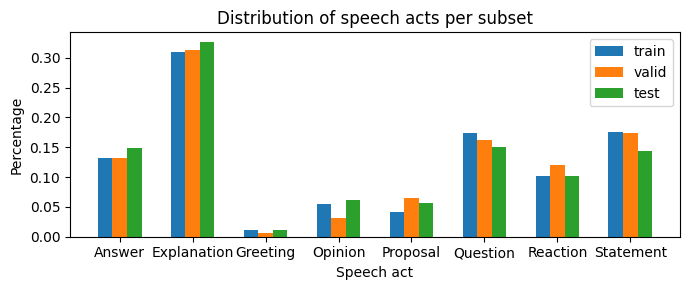

In [9]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 3))

labels = MSC_SpeechAct.classes

all_acts = sorted(df_speechacts['Act'].unique())
data = {
    subset: {c: avg for c, avg in m[subset]['avg_samples_perclass']}
    for subset in subsets
}
x = np.arange(len(all_acts))

for i, subset in enumerate(subsets):
    y = [data[subset].get(a, 0) for a in all_acts]
    offset = 0.2 * i - 0.2
    ax.bar(x=x+offset, height=y, width=0.2, label=subset)
    ax.legend()

ax.set_title("Distribution of speech acts per subset")
ax.set_ylabel("Percentage")
ax.set_xlabel("Speech act")
ax.set_xticks(x)
ax.set_xticklabels(labels.values())
fig.tight_layout()

## Check consistency

In [38]:
act = 'A'
subset = 'train'
selection = (df_speechacts['Act'] == act) & (df_speechacts['subset'] == subset)

data = df_speechacts[selection]['Speech'].to_list()
for speech in data:
    print(speech)

I really enjoyed them, and that was the reason I took them.
Maybe a Chihuahua.
They recommended a couple of pizza places around town, and a really cool Vietnamese fusion restaurant.
Bone-in ribeye steak from trader joe's.
Yeah that has happened a few times already with my dog who has diabetes!
I don't have construction experience but I am a very fast learner.
I would love that!
I'm great.
Just chilling, looking for inspiration to paint.
Some good small breeds are mini poodles, bichon frise's little white fluffy dogs are great too.
This is his first big case.
I do like the quiet nature of it, but I am retired.
My parents really didn't want an animal in the house, so I didn't growing up.
I think last week, across the lake and back, as a neat little stress reliever.
it is a lot harder, that is why I wanted to change my routine.
I'd love to!
Yes!
 I have painted something new!
No, it's a ramen restaurant!
I dont know...
Hey just over here reading.
No they don't stink really if you feed it 

### Confusion matrix

In [271]:
cm = np.array([[23, 15, 0, 1, 2, 0, 4, 10],
    [13, 87, 0, 4, 3, 1, 4, 9],
    [0, 0, 4, 0, 0, 0, 0, 0],
    [1, 9, 0, 8, 1, 0, 0, 4],
    [0, 6, 0, 0, 13, 0, 1, 1],
    [0, 0, 0, 0, 1, 55, 0, 0],
    [2, 4, 1, 0, 0, 0, 30, 1],
    [1, 9, 0, 1, 0, 0, 0, 42]])
old_cm = np.array([[12, 17,  0,  0,  2,  3, 15],
    [ 4, 89,  0,  0,  0,  0, 16],
    [ 0,  0,  1,  1,  0,  2,  0],
    [ 0,  0,  0, 49,  3,  0,  0],
    [ 1,  2,  0,  1, 11,  0,  0],
    [ 4,  2,  0,  0,  0, 29,  1],
    [ 1, 19,  0,  0,  0,  0, 47]]
)

In [279]:
def calc_stats(cm):
    prec = []
    recall = []
    f1 = []
    colsum = np.sum(cm, axis=0)
    rowsum = np.sum(cm, axis=1)
    for i in range(cm.shape[0]):
        p = cm[i][i] / colsum[i]
        r = cm[i][i] / rowsum[i]
        prec.append(p)
        recall.append(r)
        f1.append(2 * p * r / (p+r))
    weighted_prec = sum(np.array(prec) * rowsum) / sum(rowsum)
    weighted_recall = sum(np.array(recall) * rowsum) / sum(rowsum)
    weighted_f1 = sum(np.array(f1) * rowsum) / sum(rowsum)
    # print(prec)
    # print(recall)
    # print(f1)
    # print(weighted_prec, weighted_recall, weighted_f1)
    stats = np.array([prec, recall, f1]).T
    summary = np.array([weighted_prec, weighted_recall, weighted_f1])
    # print(stats, summary)
    return np.concatenate([stats, summary.reshape(1, -1)], axis=0)

In [280]:
def plot_hm(cm, classes):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8,4))

    labels = [MSC_SpeechAct.classes[c] for c in classes]

    # Confusion matrix
    ax = axs
    ax.imshow(cm, cmap='Blues')

    for r, row in enumerate(cm):
        for c, v in enumerate(row):
            color = 'k' if v < np.max(cm) * 0.6 else 'w'
            ax.text(c, r, v, color=color, ha='center', va='center',)
        ax.text(c+1, r, sum(row), ha='center', va='center')
    for c, t in enumerate(np.sum(cm, axis=0)):
        ax.text(c, len(cm), t, ha='center', va='center')

    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top') 
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='left')
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_ylabel("True speech act")
    ax.set_xlabel("Predicted speech act")

    # Table with prediction statistics
    ax = axs
    celltext = [
        [f"{v:.2f}" for v in row]
        for row in calc_stats(cm)
    ]
    ax.table(cellText=celltext,
        colLabels = ['Precision', 'Recall', 'F1-score'],
        bbox=[1.3,-1/8, 1, 10/8],
        edges='horizontal'
    )

    fig.tight_layout()



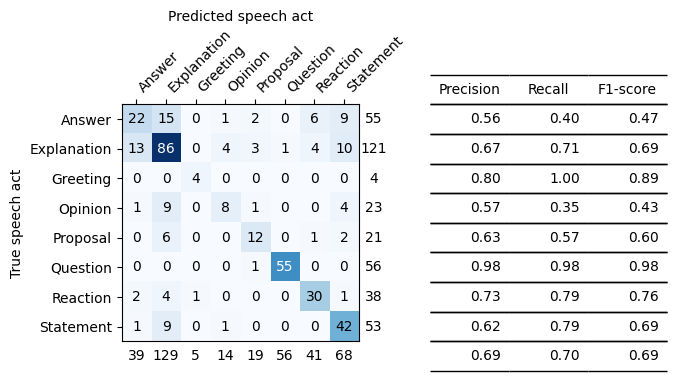

In [281]:
plot_hm(cm, MSC_SpeechAct.classes.keys())

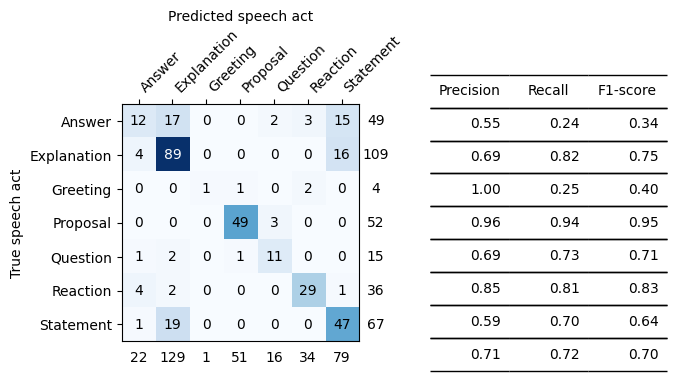

In [282]:
plot_hm(old_cm, ['A', 'E', 'G', 'P', 'Q', 'R', 'S'])